In [38]:
from matplotlib import pyplot as plt
import numpy as np

# Linear regression

Let’s discuss an algorithm called linear regression in detail. This comes under supervised learning.

We have the below dataset where X is an input and Y is an output.


| X (Input) | 1 | 2 | 3 | 4 | 5 | 6 | ... |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Y (Output) | 3 | 5 | 7 | 9 | 11 | 13 | ... |

**The task is to train a model which can predict an output (Y) given an arbitrary input (X) which is not in the data set.**
>
Let's plot this as a graph

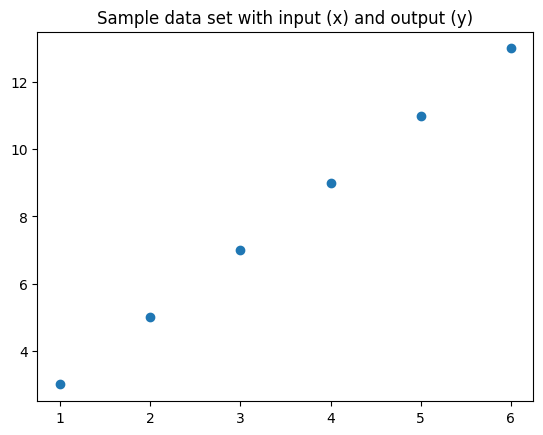

In [40]:
x = [1,2,3,4,5,6]
y = [3,5,7,9,11,13]
fig, ax = plt.subplots()

ax.scatter(x=x, y=y)
ax.set(title="Sample data set with input (x) and output (y)")
plt.show()

It is evident from the graph that a straight line can be fitted for the given data points. 
>
Using extrapolation, we can find Y for any arbitrary input X. 
>
We can define a model for fitting a straight line and let a machine learn the parameters of the model.
>
- **Y = mX + b** 
>
where **m** and **b** are the parameters of the model.
>

The goal is to find the best values for the parameters (slope (m) and intercept (b) ) that minimize the error between the predicted values and the actual target values.

>
If you look closer, you can identify the equation between X and Y.

- Y = 2X where m=2 and b=1

>
Let’s see how we find the values m and b using linear regression.
>
The steps for linear regression are as follows:

# Initialization:
We start by initializing the values of the parameters (slope and intercept) with some arbitrary values. 
>
These values can be chosen randomly or set to zero. Let's initialize the parameters m and b to zero.

In [45]:
m=0;
b =0;
n = len(x)

# Forward propagation:
Evaluate the output (y_pred) using the values initialized for parameters m and b 
>
- **y_pred = m*x + b**

In [46]:
y_pred = np.multiply(m, x) + b;
print(y_pred);

[0 0 0 0 0 0]


# Define the loss function:
In linear regression, the most common loss function is the mean squared error (MSE), which measures the average squared difference between the predicted values and the actual target values. 
>
**The MSE (L) is given by:**
L = (1/n) * Σ(y_pred - y)^2 
>
where **n** is the number of data points in the dataset
>
**y_pred** is the predicted value for a given input (X) using the current parameter values
>
**y** is the actual target value corresponding to the input (X)


In [49]:
L = sum(np.square(np.subtract(y_pred, y)))/n
print(L);

75.66666666666667


# Calculate the gradients: The gradients represent how the loss function changes with respect to each parameter. 
>
We need to compute the partial derivatives of the loss function with respect to the parameters (slope and intercept). 
>
The gradients are calculated as follows: 
- dL/dm = (2/n) * Σ(X * (y_pred - y_actual)) 
- dL/db = (2/n) * Σ(y_pred - y_actual)
Let's see how we derived the gradients dL/dm  and dL/db in detail.
- L = (1/n) * Σ(y_pred - y_actual)^2 
- dL/dm = (1/n) * Σ(2 * (y_pred - y_actual) * d(y_pred)/dm)
- y_pred = m * X + b
- d(y_pred)/dm = d(m*X + b)/dm = X 

- ∴  dL/dM = (2/n) * Σ((y_pred- y_actual) * X)

**dL/db = (1/n) * Σ(2 * (y_pred - y_actual) * d(y_pred)/db)**
>
**y_pred = m * X + b**
>
**d(y_pred)/db = d(m*X + b)/db = 1**

∴ dL/db = (2/n) * Σ(y_pred - y_actual)


In [50]:
dL_m = (2/n) * sum(x * (y_pred - y));
print(dL_m);
dL_b = (2/n) * sum(y_pred - y);
print(dL_b);

-67.66666666666666
-16.0


# Update the parameters: 
The parameters are updated iteratively using the gradients and a learning rate (α) that controls the step size of each update. 
>
The parameter update equations are as follows: 
- m= m - α * dL/dm 
- b = b - α * dL/db
>
**Where:** 
α (alpha) is the learning rate, a small positive value that determines the step size of the update


In [52]:
alpha = 0.01;
m = m - (alpha * dL_m);
print("updated m = ", m);

b = b - (alpha * dL_b);
print("updated b = ", b);

updated m =  1.3533333333333333
updated b =  0.32


# Repeat steps 4 and 5:
The previous steps are repeated until the loss function (L) converges to zero or threshold or a predefined number of iterations. 
>
Let's update the parameters by calculating gradient descent for 100 times and see how the loss converges

In [54]:
iterations_count = 1000;
for i in range(iterations_count):
    y_pred = np.multiply(m, x) + b;

    L = sum(np.square(np.subtract(y_pred, y)))/n;

    dL_m = (2/n) * sum(x * (y_pred - y)) ;

    dL_b = (2/n) * sum(y_pred - y) ;

    m = m - (alpha * dL_m);

    b = b - (alpha * dL_b);
    
    if i==iterations_count-1:
        print(y_pred);
        print(L);
        print(dL_m);
        print(dL_m);
        print("updated m = ", m);
        print("updated b = ", b);

[ 2.99308508  4.99519252  6.99729995  8.99940739 11.00151483 13.00362227]
1.5664156474195683e-05
0.0007690961547887435
0.0007690961547887435
updated m =  2.002099746075972
updated b =  0.9910105702497091
